In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

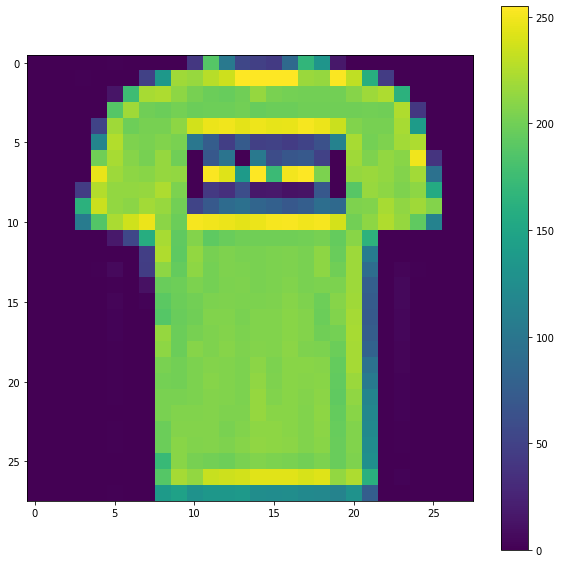

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

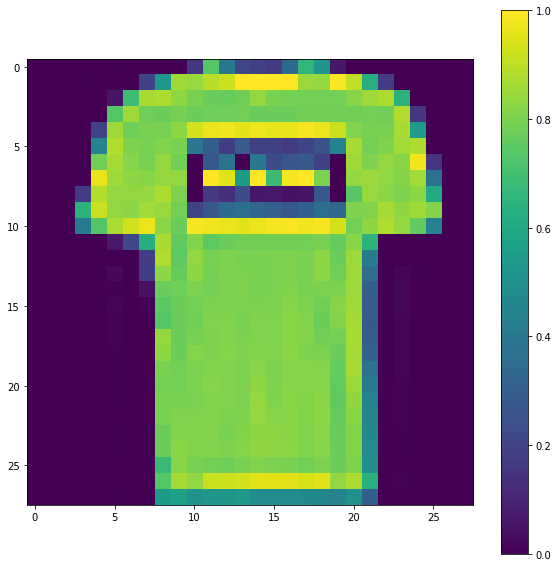

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

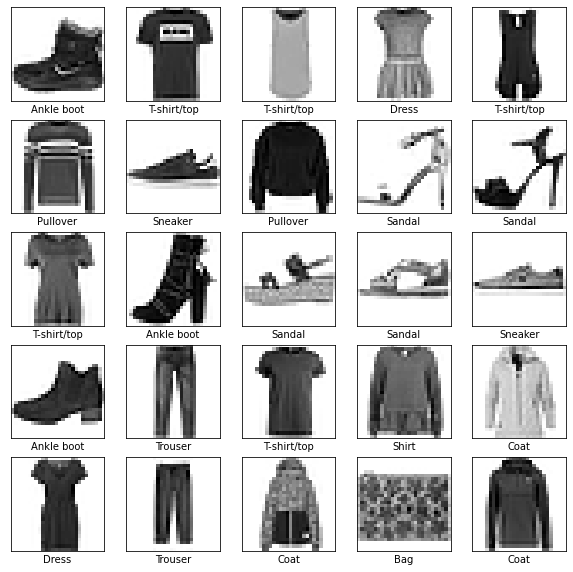

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4951 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3143 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2963 - accuracy: 0.8904


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8709


In [15]:
predictions=model.predict(test_images)

In [16]:
predictions[0]

array([1.1475246e-05, 2.1662638e-07, 7.3063029e-07, 4.0874338e-07,
       8.2410825e-06, 9.3356771e-03, 2.8774521e-05, 1.0356798e-02,
       6.6857225e-05, 9.8019081e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

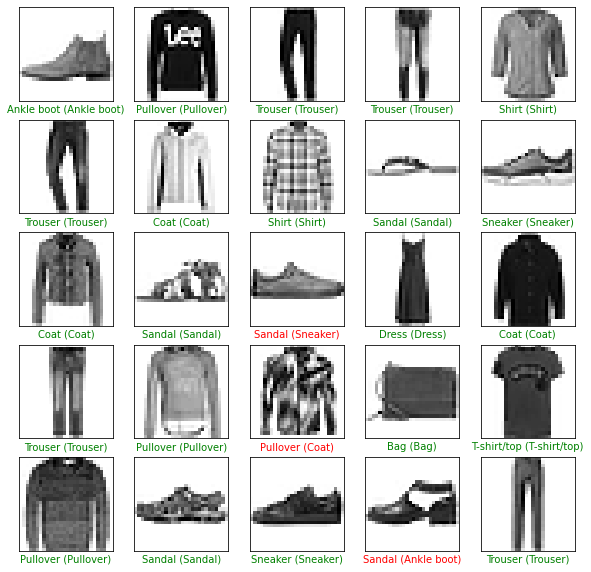

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label],
                                class_names[true_label]),
               color=color)


In [22]:
def plot_image(i, predictions_array, true_label, img):
 predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(img, cmap=plt.cm.binary)
 predicted_label = np.argmax(predictions_array)
 if predicted_label == true_label:
     color = 'blue'
 else:
     color = 'red'
 plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
 100*np.max(predictions_array),
 class_names[true_label]),
 color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
 predictions_array, true_label = predictions_array[i], true_label[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 thisplot = plt.bar(range(10), predictions_array, color="#777777")
 plt.ylim([0, 1])
 predicted_label = np.argmax(predictions_array)
 thisplot[predicted_label].set_color('red')
 thisplot[true_label].set_color('blue')

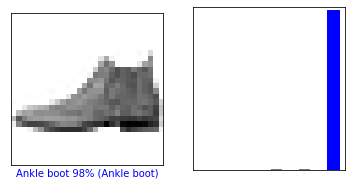

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

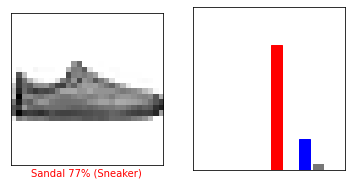

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

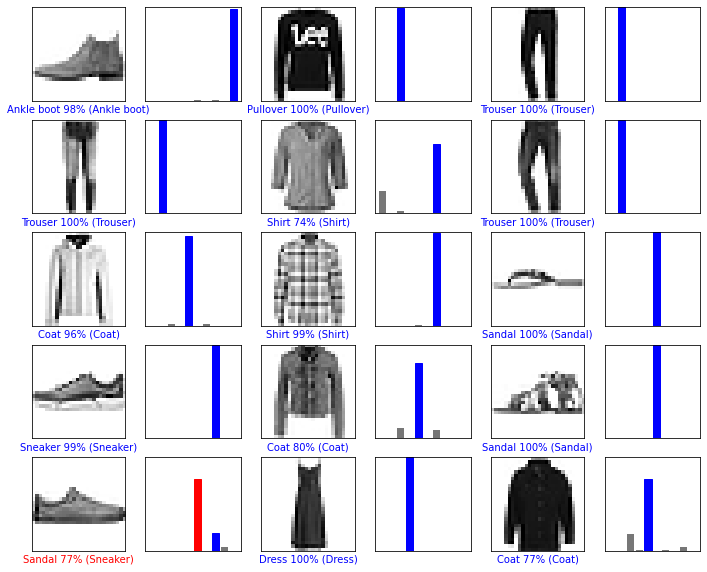

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions, test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions, test_labels)
plt.show()

In [27]:
img = test_images[0]

In [28]:
print(img.shape)

(28, 28)


In [29]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1475246e-05 2.1662699e-07 7.3063029e-07 4.0874261e-07 8.2410907e-06
  9.3356855e-03 2.8774548e-05 1.0356798e-02 6.6857356e-05 9.8019081e-01]]


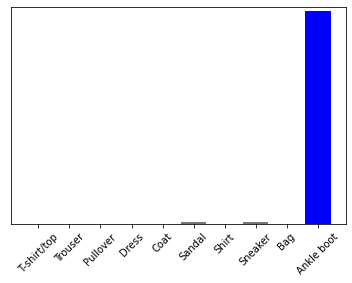

In [31]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
